In [1]:
# Importing Neccessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import re
import nltk
import string
import nlp_utils
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

In [2]:
# Loading train dataset.
df=pd.read_csv('train.csv')  

In [3]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
df.isnull().sum()                                       # There are no null values.

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [6]:
df['toxic'].value_counts()                              # Counts of toxic and non toxic sentences.

0    144277
1     15294
Name: toxic, dtype: int64

In [7]:
df['severe_toxic'].value_counts()                       # Counts of severe_toxic and non severe_toxic sentences.

0    157976
1      1595
Name: severe_toxic, dtype: int64

In [8]:
df['obscene'].value_counts()                            # Counts of obscene and non obscene sentences.

0    151122
1      8449
Name: obscene, dtype: int64

In [9]:
df['threat'].value_counts()                             # Counts of threat and non threatening sentences.

0    159093
1       478
Name: threat, dtype: int64

In [10]:
df['insult'].value_counts()                             # Counts of insult and non insulting sentences.

0    151694
1      7877
Name: insult, dtype: int64

In [11]:
df['identity_hate'].value_counts()                      # Counts of toxic and non identity_hate sentences.

0    158166
1      1405
Name: identity_hate, dtype: int64

### Let us visualize a bargraph on all the 6 categories of sentences.

In [12]:
sentencetype_graph=df.iloc[:,2:].sum()              

In [13]:
sentencetype_graph

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

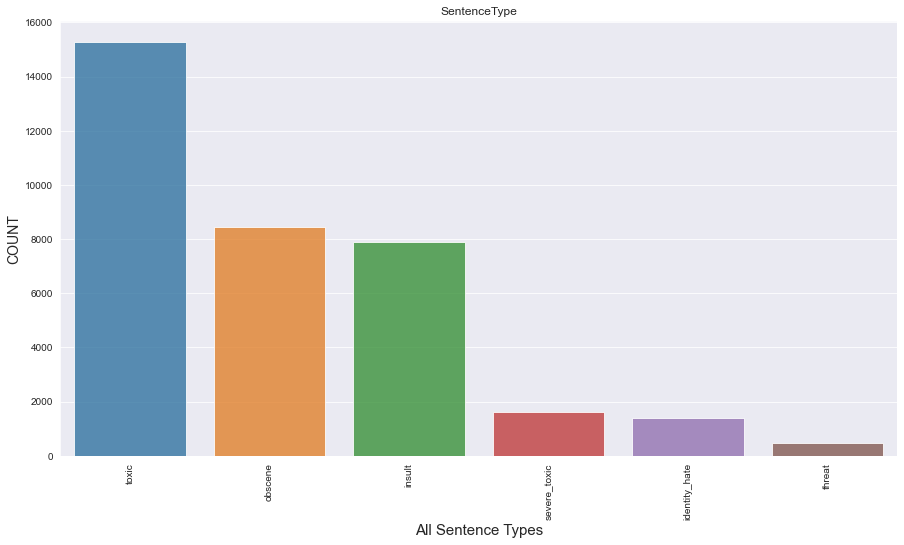

In [14]:
sns.set_style("darkgrid")
ls=sentencetype_graph.sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8) 
plt.title('SentenceType')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('All Sentence Types', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

In [15]:
# There are a many toxic sentences followed by obscene sentences and very few threatening sentences as seen above. 

# Text Pre-processing

In [16]:
df['comment_text'][10]

'"\nFair use rationale for Image:Wonju.jpg\n\nThanks for uploading Image:Wonju.jpg. I notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in Wikipedia articles constitutes fair use. In addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use.\n\nPlease go to the image description page and edit it to include a fair use rationale.\n\nIf you have uploaded other fair use media, consider checking that you have specified the fair use rationale on those pages too. You can find a list of \'image\' pages you have edited by clicking on the ""my contributions"" link (it is located at the very top of any Wikipedia page when you are logged in), and then selecting ""Image"" from the dropdown box. Note that any fair use images uploaded after 4 May, 2006, and lacking such a

In [17]:
##########################################################################################################################

In [18]:
import re
import string

# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
df['comment_text'] = df['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

df['comment_text'][10]

'  fair use rationale for image wonju jpg  thanks for uploading image wonju jpg  i notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in wikipedia articles constitutes fair use  in addition to the boilerplate fair use template  you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use   please go to the image description page and edit it to include a fair use rationale   if you have uploaded other fair use media  consider checking that you have specified the fair use rationale on those pages too  you can find a list of  image  pages you have edited by clicking on the   my contributions   link  it is located at the very top of any wikipedia page when you are logged in   and then selecting   image   from the dropdown box  note that any fair use images uploaded after   may     and lacking such an explanatio

In [19]:
#df['comment_text'][10]

In [20]:
Toxic_comment_df=df.loc[:,['id','comment_text','toxic']]

In [21]:
Severetoxic_comment_df=df.loc[:,['id','comment_text','severe_toxic']]

In [22]:
Obscene_comment_df=df.loc[:,['id','comment_text','obscene']]

In [23]:
Threatening_comment_df=df.loc[:,['id','comment_text','threat']]

In [24]:
Insulting_comment_df=df.loc[:,['id','comment_text','insult']]

In [25]:
IdentityHate_comment_df=df.loc[:,['id','comment_text','identity_hate']]

In [26]:
# Subset datasets.

In [27]:
Toxic_comment_df

,id,comment_text,toxic
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [28]:
Severetoxic_comment_df

,id,comment_text,severe_toxic
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [29]:
Obscene_comment_df

,id,comment_text,obscene
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [30]:
Threatening_comment_df

,id,comment_text,threat
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [31]:
Insulting_comment_df

,id,comment_text,insult
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [32]:
IdentityHate_comment_df

,id,comment_text,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [33]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [34]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

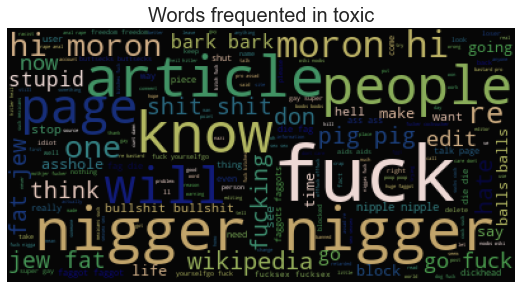

In [35]:
wordcloud(Toxic_comment_df,'toxic')

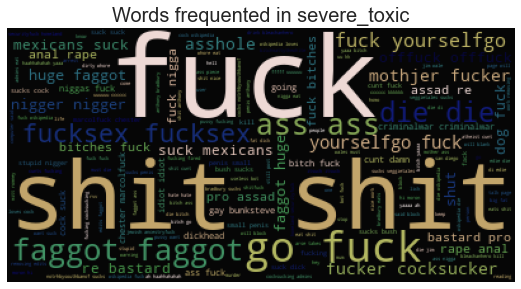

In [36]:
wordcloud(Severetoxic_comment_df,'severe_toxic')

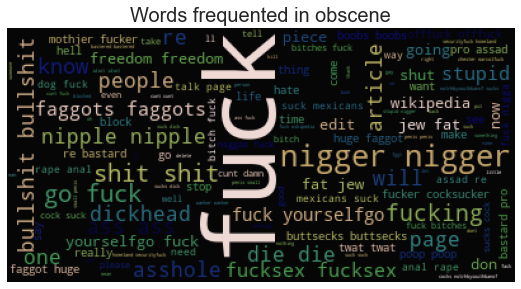

In [37]:
wordcloud(Obscene_comment_df,'obscene')

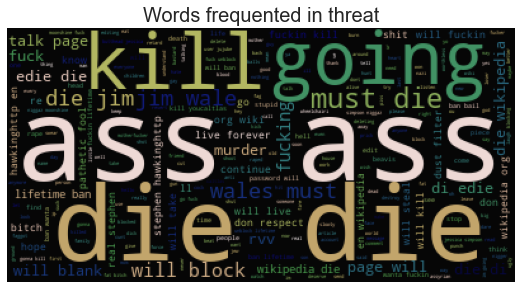

In [38]:
wordcloud(Threatening_comment_df,'threat')

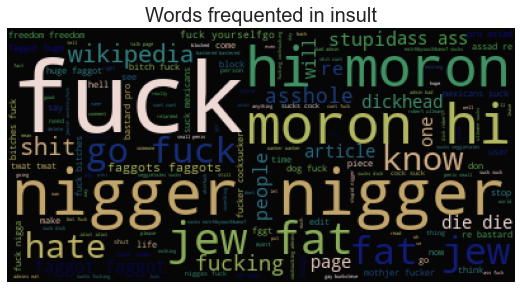

In [39]:
wordcloud(Insulting_comment_df,'insult')

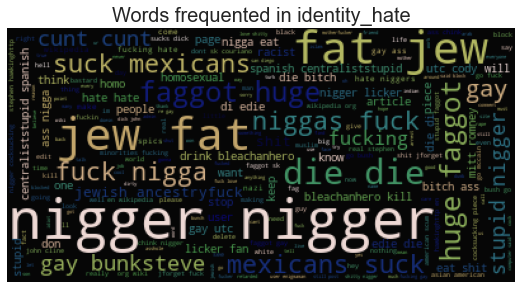

In [40]:
wordcloud(IdentityHate_comment_df,'identity_hate')

In [41]:
Toxic_comment_df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [42]:
Toxic_comment_df.shape

(159571, 3)

In [43]:
Toxic_comment_balanced_1 = Toxic_comment_df[Toxic_comment_df['toxic'] == 1].iloc[0:5000,:]

In [44]:
Toxic_comment_balanced_0 = Toxic_comment_df[Toxic_comment_df['toxic'] == 0].iloc[0:5000,:]

In [45]:
Toxic_comment_balanced_1.shape

(5000, 3)

In [46]:
Toxic_comment_balanced_0.shape

(5000, 3)

In [47]:
Toxic_comment_balanced_1['toxic'].value_counts()

1    5000
Name: toxic, dtype: int64

In [48]:
Toxic_comment_balanced_0['toxic'].value_counts()

0    5000
Name: toxic, dtype: int64

In [49]:
Toxic_comment_balanced=pd.concat([Toxic_comment_balanced_1,Toxic_comment_balanced_0])

In [50]:
Toxic_comment_balanced['toxic'].value_counts()

1    5000
0    5000
Name: toxic, dtype: int64

In [51]:
Severetoxic_comment_df['severe_toxic'].value_counts()

0    157976
1      1595
Name: severe_toxic, dtype: int64

In [52]:
Severetoxic_comment_df_1 = Severetoxic_comment_df[Severetoxic_comment_df['severe_toxic'] == 1].iloc[0:1595,:]

In [53]:
Severetoxic_comment_df_0 = Severetoxic_comment_df[Severetoxic_comment_df['severe_toxic'] == 0].iloc[0:1595,:]

In [54]:
Severe_toxic_comment_balanced=pd.concat([Severetoxic_comment_df_1,Severetoxic_comment_df_0])

In [55]:
Severe_toxic_comment_balanced['severe_toxic'].value_counts()

1    1595
0    1595
Name: severe_toxic, dtype: int64

In [56]:
Obscene_comment_df['obscene'].value_counts()

0    151122
1      8449
Name: obscene, dtype: int64

In [57]:
Obscene_comment_df_1 = Obscene_comment_df[Obscene_comment_df['obscene'] == 1].iloc[0:5000,:]

In [58]:
Obscene_comment_df_0 = Obscene_comment_df[Obscene_comment_df['obscene'] == 0].iloc[0:5000,:]

In [59]:
Obscene_comment_balanced = pd.concat([Obscene_comment_df_1,Obscene_comment_df_0])

In [60]:
Obscene_comment_balanced['obscene'].value_counts()

1    5000
0    5000
Name: obscene, dtype: int64

In [61]:
Threatening_comment_df

,id,comment_text,threat
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [62]:
Threatening_comment_df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [63]:
Threatening_comment_df_1 = Threatening_comment_df[Threatening_comment_df['threat'] == 1].iloc[0:478,:]

In [64]:
Threatening_comment_df_0 = Threatening_comment_df[Threatening_comment_df['threat'] == 0].iloc[0:478,:]

In [65]:
Threatening_comment_balanced = pd.concat([Threatening_comment_df_1,Threatening_comment_df_0])

In [66]:
Threatening_comment_balanced['threat'].value_counts()

1    478
0    478
Name: threat, dtype: int64

In [67]:
Threatening_comment_balanced

,id,comment_text,threat
79,003217c3eb469ba9,hi i am back again last warning stop undoin...,1
176,006b94add72ed61c,i think that your a fagget get a oife and burn...,1
600,0199d6af27b715f3,i m also a sock puppet of this account supri...,1
802,02230885017a50c5,fuck you smith please have me notified when ...,1
1017,02c6e41e4b317ac3,wouldn t be the first time bitch fuck you i l...,1
...,...,...,...
475,01389dc7e054bfe5,hello if you re interested we could re...,0
476,013ad5246f4b953b,f k all rides at worlds of fun i hate all ...,0
477,013bd808a6d3d69b,as to job for you sure thing as soon as i ...,0
478,013c1a43411c5f9a,oh ok i just wanted to see what people though...,0


In [68]:
Insulting_comment_df['insult'].value_counts()

0    151694
1      7877
Name: insult, dtype: int64

In [69]:
Insulting_comment_df_1 = Insulting_comment_df[Insulting_comment_df['insult'] == 1].iloc[0:5000,:]

In [70]:
Insulting_comment_df_0 = Insulting_comment_df[Insulting_comment_df['insult'] == 0].iloc[0:5000,:]

In [71]:
Insulting_comment_balanced = pd.concat([Insulting_comment_df_1,Insulting_comment_df_0])

In [72]:
Insulting_comment_balanced['insult'].value_counts()

1    5000
0    5000
Name: insult, dtype: int64

In [73]:
IdentityHate_comment_df['identity_hate'].value_counts()

0    158166
1      1405
Name: identity_hate, dtype: int64

In [74]:
IdentityHate_comment_df_1 = IdentityHate_comment_df[IdentityHate_comment_df['identity_hate'] == 1].iloc[0:1405,:]

In [75]:
IdentityHate_comment_df_0 = IdentityHate_comment_df[IdentityHate_comment_df['identity_hate'] == 0].iloc[0:1405,:]

In [76]:
IdentityHate_comment_balanced = pd.concat([IdentityHate_comment_df_1,IdentityHate_comment_df_0])

In [77]:
IdentityHate_comment_balanced['identity_hate'].value_counts()

1    1405
0    1405
Name: identity_hate, dtype: int64

In [78]:
# Import packages for pre-processing
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# Import ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import ngrams,bigrams,trigrams

In [79]:
def cv_tf_train_test(df_done,label,vectorizer,ngram):

    # Split the data into X and y data sets
    X = df_done.comment_text
    y = df_done[label]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    # Create a Vectorizer object and remove stopwords from the table
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    X_train_cv1 = cv1.fit_transform(X_train) # Learn the vocabulary dictionary and return term-document matrix
    X_test_cv1  = cv1.transform(X_test)      # Learn a vocabulary dictionary of all tokens in the raw documents.
    
    # Output a Dataframe of the CountVectorizer with unique words as the labels
    # test = pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names())
        
    lr = LogisticRegression()
    lr.fit(X_train_cv1, y_train)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)

    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)
    
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)
    
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_cv1, y_train)
    
    f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test), 
                                f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test),
                                f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]} 
                          
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])  

    return df_f1

In [80]:
toxic_comment_cv = cv_tf_train_test(Toxic_comment_balanced, 'toxic', TfidfVectorizer, (1,1))
toxic_comment_cv.rename(columns={'F1 Score': 'F1 Score(toxic)'}, inplace=True)
toxic_comment_cv

# Various permutations of the dataset, category, vectorizer and n-gram

cv_tf_train_test(Toxic_comment_balanced, 'toxic', TfidfVectorizer, (1,1))
cv_tf_train_test(Severe_toxic_comment_balanced, 'severe_toxic', TfidfVectorizer, (1,1))
cv_tf_train_test(Obscene_comment_balanced, 'obscene', TfidfVectorizer, (1,1))
cv_tf_train_test(Threatening_comment_balanced, 'threat', TfidfVectorizer, (1,1))
cv_tf_train_test(Insulting_comment_balanced, 'insult', TfidfVectorizer, (1,1))
cv_tf_train_test(IdentityHate_comment_balanced, 'identity_hate', TfidfVectorizer, (1,1))


,F1 Score
Log Regression,0.906600
KNN,0.786364
BernoulliNB,0.794059
MultinomialNB,0.921820
SVM,0.906024
Random Forest,0.904110


In [81]:
severe_toxic_comment_cv = cv_tf_train_test(Severe_toxic_comment_balanced, 'severe_toxic', TfidfVectorizer, (1,1))
severe_toxic_comment_cv.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)
severe_toxic_comment_cv

,F1 Score(severe_toxic)
Log Regression,0.927879
KNN,0.857416
BernoulliNB,0.803707
MultinomialNB,0.936170
SVM,0.926004
Random Forest,0.934874


In [82]:
obscene_comment_cv = cv_tf_train_test(Obscene_comment_balanced, 'obscene', TfidfVectorizer, (1,1))
obscene_comment_cv.rename(columns={'F1 Score': 'F1 Score(obscene)'}, inplace=True)
obscene_comment_cv

,F1 Score(obscene)
Log Regression,0.908655
KNN,0.519056
BernoulliNB,0.787830
MultinomialNB,0.901463
SVM,0.921378
Random Forest,0.909091


In [83]:
threat_comment_cv = cv_tf_train_test(Threatening_comment_balanced, 'threat', TfidfVectorizer, (1,1))
threat_comment_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)
threat_comment_cv

,F1 Score(threat)
Log Regression,0.900369
KNN,0.851211
BernoulliNB,0.770950
MultinomialNB,0.902357
SVM,0.898551
Random Forest,0.901515


In [84]:
insult_comment_cv = cv_tf_train_test(Insulting_comment_balanced, 'insult', TfidfVectorizer, (1,1))
insult_comment_cv.rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)
insult_comment_cv

,F1 Score(insult)
Log Regression,0.896599
KNN,0.257992
BernoulliNB,0.783762
MultinomialNB,0.897411
SVM,0.902619
Random Forest,0.883993


In [85]:
identity_hatecomment_cv = cv_tf_train_test(IdentityHate_comment_balanced, 'identity_hate', TfidfVectorizer, (1,1))
identity_hatecomment_cv.rename(columns={'F1 Score': 'F1 Score(identity_hate)'}, inplace=True)
identity_hatecomment_cv

,F1 Score(identity_hate)
Log Regression,0.906600
KNN,0.786364
BernoulliNB,0.794059
MultinomialNB,0.921820
SVM,0.906024
Random Forest,0.904110


In [86]:
Final_Dataframe = pd.concat([toxic_comment_cv, severe_toxic_comment_cv, obscene_comment_cv, insult_comment_cv, threat_comment_cv, identity_hatecomment_cv], axis=1)
Final_Dataframe

,F1 Score(toxic),F1 Score(severe_toxic),F1 Score(obscene),F1 Score(insult),F1 Score(threat),F1 Score(identity_hate)
Log Regression,0.861234,0.927879,0.908655,0.896599,0.900369,0.906600
KNN,0.185120,0.857416,0.519056,0.257992,0.851211,0.786364
BernoulliNB,0.776521,0.803707,0.787830,0.783762,0.770950,0.794059
MultinomialNB,0.874958,0.936170,0.901463,0.897411,0.902357,0.921820
SVM,0.876133,0.926004,0.921378,0.902619,0.898551,0.906024
Random Forest,0.838055,0.934874,0.909091,0.883993,0.901515,0.904110


In [87]:
Final_Dataframe_transpose = Final_Dataframe.transpose()
Final_Dataframe_transpose

,Log Regression,KNN,BernoulliNB,MultinomialNB,SVM,Random Forest
F1 Score(toxic),0.861234,0.185120,0.776521,0.874958,0.876133,0.838055
F1 Score(severe_toxic),0.927879,0.857416,0.803707,0.936170,0.926004,0.934874
F1 Score(obscene),0.908655,0.519056,0.787830,0.901463,0.921378,0.909091
F1 Score(insult),0.896599,0.257992,0.783762,0.897411,0.902619,0.883993
F1 Score(threat),0.900369,0.851211,0.770950,0.902357,0.898551,0.901515
F1 Score(identity_hate),0.906600,0.786364,0.794059,0.921820,0.906024,0.904110


Text(0.5, 1.0, 'F1 Score of ML models (TF-IDF)')

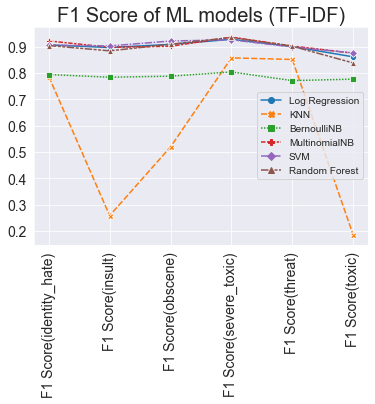

In [88]:
sns.lineplot(data=Final_Dataframe_transpose, size=[10,10], markers=True)
plt.xticks(rotation='90', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best')
plt.title('F1 Score of ML models (TF-IDF)', fontsize=20)

In [89]:
Insulting_comment_balanced.head()

,id,comment_text,insult
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1
42,001810bf8c45bf5f,you are gay or antisemmitian archangel whit...,1
43,00190820581d90ce,fuck your filthy mother in the ass dry,1
55,0020e7119b96eeeb,stupid peace of shit stop deleting my stuff as...,1
56,0020fd96ed3b8c8b,tony sidaway is obviously a fistfuckee he lo...,1


In [90]:
X = Toxic_comment_balanced.comment_text
y = Toxic_comment_balanced['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  # Convert the X data into a document term matrix dataframe
X_test_fit = tfv.transform(X_test)  # Converts the X_test comments into Vectorized format

randomforest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train our SVM model with the X training data converted into Count Vectorized format with the Y training data
randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [91]:
comment1 = ['I will kill you all idiots']
comment2 = ['Is this sentence a good one']

comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([0.98222222])

In [92]:
comment2_vect = tfv.transform(comment2)
randomforest.predict_proba(comment2_vect)[:,1]

array([0.09150794])

In [93]:
import pickle

In [94]:
#def pickle_model(df, label):
    
#    X = df.comment_text
#    y = df[label]

    # Initiate a Tfidf vectorizer
#    tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    
    # Convert the X data into a document term matrix dataframe
#    X_vect = tfv.fit_transform(X)  
    
    # saves the column labels (ie. the vocabulary)
    # wb means Writing to the file in Binary mode, written in byte objects
#    with open(r"{}.pkl".format(label + '_vect'), "wb") as f:   
#        pickle.dump(tfv, f)   
        
#    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
#    randomforest.fit(X_vect, y)

    # Create a new pickle file based on random forest
#    with open(r"{}.pkl".format(label + '_model'), "wb") as f:  
#        pickle.dump(randomforest, f)

In [95]:
#datalist = [Toxic_comment_balanced,Severe_toxic_comment_balanced,Obscene_comment_df,Insulting_comment_df,Threatening_comment_df,IdentityHate_comment_balanced]
#label = ['toxic', 'severe_toxic', 'obscene', 'insult', 'threat', 'identity_hate']

#for i,j in zip(datalist,label):
#    pickle_model(i, j)    